Reading files

In [109]:

import pandas as pd

# Step 2: Specify the file path
file_path = "prediction_file.csv"  # Replace with the actual file path

# Step 3: Read the .csv file
df = pd.read_csv(file_path)

# Extract values of a specific column as a list
demand_values = df['2016'].tolist()
print(demand_values)


[7.387925148, 40.43184662, 59.18162918, 74.53672028, 16.53131485, 23.59261703, 37.77179718, 72.29115295, 31.31279564, 36.00815201, 7.731999874, 4.729420662, 4.019220352, 0.170855775, 0.407948494, 29.41272354, 94.71604919, 128.6074066, 119.6863556, 60.41845703, 82.89323425, 90.87753296, 116.8996277, 109.9925232, 87.78025055, 77.210495, 42.75498581, 27.09572029, 3.248904228, 0.316811502, 25.035532, 87.5641098, 150.813324, 132.3540192, 117.1153717, 98.37117767, 166.2753143, 131.4788666, 102.0719376, 68.13217163, 87.15248108, 98.95579529, 89.4603653, 18.38335991, 1.929136515, 0.109720692, 0.536449432, 21.13311577, 79.66234589, 121.5448074, 106.9424896, 78.92514801, 104.6953964, 134.6973419, 116.9567261, 122.0452118, 171.2545319, 134.3496246, 105.8578873, 89.86942291, 68.56171417, 20.19329834, 9.653676033, 17.03986931, 7.286772728, 5.554096222, 6.31090641, 0.384940833, 0.202268958, 10.07473373, 107.5643158, 137.4429321, 111.0048981, 82.23817444, 146.8779297, 175.9665833, 105.6868515, 105.94

In [110]:
file_path_distmat = 'Distance_Matrix.csv'

# Step 3: Read the .csv file
df2 = pd.read_csv(file_path_distmat , index_col=0)

# Extract the distance matrix as a list of lists
distance_matrix = df2.values.tolist()




K means without capasity constraints

In [111]:
def calculate_cluster_demand(cluster_indices, demands):
    """
    Calculate the total demand of a cluster.

    Parameters:
    - cluster_indices: Indices of nodes in the cluster.
    - demands: Array containing the demand of each node.

    Returns:
    - Total demand of the cluster.
    """
    
    return np.sum(demands[cluster_indices])

for i,c in  enumerate(clusters.items()):
    print(f"Cluster number : {i} , Cluster capasity : {calculate_cluster_demand(c[1], np.array(demand_values))}")

Cluster number : 0 , Cluster capasity : 18854.149272154
Cluster number : 1 , Cluster capasity : 19978.416415073003
Cluster number : 2 , Cluster capasity : 19923.393354377
Cluster number : 3 , Cluster capasity : 19996.567241455
Cluster number : 4 , Cluster capasity : 19997.039682182
Cluster number : 5 , Cluster capasity : 14921.772577579
Cluster number : 6 , Cluster capasity : 19963.002669090998
Cluster number : 7 , Cluster capasity : 19922.623990516004
Cluster number : 8 , Cluster capasity : 19940.546954293004
Cluster number : 9 , Cluster capasity : 19981.750709247
Cluster number : 10 , Cluster capasity : 19997.382727949
Cluster number : 11 , Cluster capasity : 19994.28492223
Cluster number : 12 , Cluster capasity : 19996.397635790996
Cluster number : 13 , Cluster capasity : 19982.653718319998


In [114]:
import numpy as np

def kmeans(distance_matrix, k, max_iters=100):
    n = distance_matrix.shape[0]  # Number of data points
    
    # Initialize centroids randomly
    centroids_idx = np.random.choice(n, k, replace=False)
    centroids = distance_matrix[centroids_idx]
    
    for _ in range(max_iters):
        # Assign points to clusters based on the minimum distance
        cluster_assignments = np.argmin(distance_matrix[:, centroids_idx], axis=1)
        
        # Update centroids based on the mean of the data points in each cluster
        for i in range(k):
            cluster_points = np.where(cluster_assignments == i)[0]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(distance_matrix[cluster_points], axis=0)
        
    # Organize nodes by cluster
    clusters = {i: np.where(cluster_assignments == i)[0] for i in range(k)}
    
    return cluster_assignments, centroids, clusters

# Example usage:
# Assuming 'distance_matrix' is your precomputed distance matrix
# 'k' is the number of clusters you want to identify

# Replace this with your actual distance matrix
distance_matrix = np.array(distance_matrix)

k = 14  # Number of clusters
cluster_assignments, centroids, clusters = kmeans(distance_matrix, k)

# print("Cluster Assignments:", cluster_assignments)
# print("Centroids:", centroids)

# Print nodes in each cluster
for i,c in  enumerate(clusters.items()):
    print(f"Cluster number : {i} , Cluster capasity : {calculate_cluster_demand(c[1], np.array(demand_values))}")


Cluster number : 0 , Cluster capasity : 7597.311089420999
Cluster number : 1 , Cluster capasity : 4595.3192830650005
Cluster number : 2 , Cluster capasity : 39661.528294147996
Cluster number : 3 , Cluster capasity : 40107.30406903599
Cluster number : 4 , Cluster capasity : 2817.542419028
Cluster number : 5 , Cluster capasity : 9134.898563118
Cluster number : 6 , Cluster capasity : 3183.336782864
Cluster number : 7 , Cluster capasity : 40607.589739225994
Cluster number : 8 , Cluster capasity : 7064.773568588999
Cluster number : 9 , Cluster capasity : 71754.14225636801
Cluster number : 10 , Cluster capasity : 3166.8877814039997
Cluster number : 11 , Cluster capasity : 6122.733210528
Cluster number : 12 , Cluster capasity : 1449.0627302359997
Cluster number : 13 , Cluster capasity : 36187.55208322599


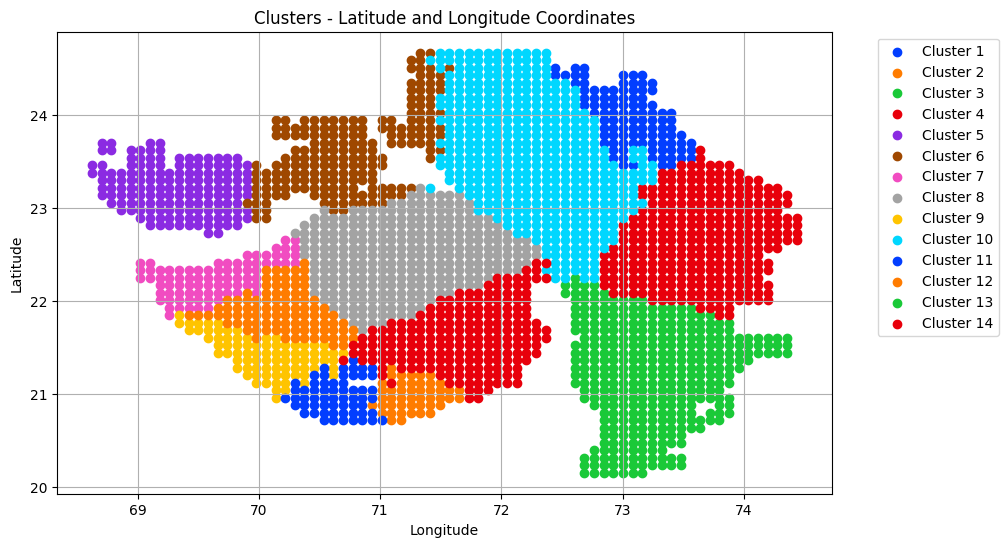

In [115]:
# Plotting each cluster with a different color
plt.figure(figsize=(10, 6))

for i, (cluster_num, cluster_indices) in enumerate(clusters.items()):
    cluster_data = df.loc[df['Index'].isin(cluster_indices)]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_num + 1}')

# Customize the plot
plt.title('Clusters - Latitude and Longitude Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

In [ ]:


def calculate_cluster_demand(cluster_indices, demands):
    """
    Calculate the total demand of a cluster.

    Parameters:
    - cluster_indices: Indices of nodes in the cluster.
    - demands: Array containing the demand of each node.

    Returns:
    - Total demand of the cluster.
    """
    
    return np.sum(demands[cluster_indices])

for i,c in  enumerate(clusters.items()):
    print(f"Cluster number : {i} , Cluster capasity : {calculate_cluster_demand(c[1], np.array(demand_values))}")
    

Cluster number : 0 , Cluster capasity : 1339.7390330609996
Cluster number : 1 , Cluster capasity : 16873.375881748998
Cluster number : 2 , Cluster capasity : 20480.82129174
Cluster number : 3 , Cluster capasity : 17651.82250505
Cluster number : 4 , Cluster capasity : 5951.381795304999
Cluster number : 5 , Cluster capasity : 34350.032387507
Cluster number : 6 , Cluster capasity : 32924.511801036
Cluster number : 7 , Cluster capasity : 3665.556360058
Cluster number : 8 , Cluster capasity : 1288.463001148
Cluster number : 9 , Cluster capasity : 14979.842390984999
Cluster number : 10 , Cluster capasity : 82724.360744023
Cluster number : 11 , Cluster capasity : 2741.638256317
Cluster number : 12 , Cluster capasity : 33883.064149555
Cluster number : 13 , Cluster capasity : 4595.372272723001


K means with capasity constraint

In [107]:
import numpy as np

def kmeans_with_capacity(distance_matrix, demand_values, k, max_iters=100, capacity=20000):
    n = distance_matrix.shape[0]  # Number of data points
    
    # Initialize centroids randomly
    centroids_idx = np.random.choice(n, k, replace=False)
    centroids = distance_matrix[centroids_idx].copy()  # Make a copy to avoid modifying the original matrix
    
    for _ in range(max_iters):
        # Assign points to clusters based on the minimum distance and capacity constraint
        cluster_assignments = assign_clusters(distance_matrix, centroids, demand_values, capacity)
        
        # Update centroids based on the mean of the data points in each cluster
        for i in range(k):
            cluster_points = np.where(cluster_assignments == i)[0]
            
            if len(cluster_points) > 0:
                centroids[i] = np.mean(distance_matrix[cluster_points], axis=0)
        
    # Organize nodes by cluster
    clusters = {i: np.where(cluster_assignments == i)[0] for i in range(k) if i in np.unique(cluster_assignments)}
    
    return cluster_assignments, centroids, clusters

def assign_clusters(distance_matrix, centroids, demand_values, capacity):
    """
    Assign nodes to clusters based on minimum distance and capacity constraints.
    """
    n, k = distance_matrix.shape[0], centroids.shape[0]
    cluster_assignments = np.empty(n, dtype=int)
    
    for node_idx in range(n):
        # Calculate distances to all centroids
        distances = np.linalg.norm(centroids - distance_matrix[node_idx], axis=1)
        
        # Check capacity constraint before assignment
        for i in np.argsort(distances):
            total_demand = np.sum(demand_values[cluster_assignments == i]) + demand_values[node_idx]
            if total_demand <= capacity:
                # Assign the node to the cluster if the capacity constraint is satisfied
                cluster_assignments[node_idx] = i
                break
    return cluster_assignments

# Example usage:
# Assuming 'distance_matrix' is your precomputed distance matrix
# 'k' is the number of clusters you want to identify
# 'demand_values' is an array where the index corresponds to the node and the value corresponds to the demand

# Replace this with your actual distance matrix and demand_values array
distance_matrix = np.array(distance_matrix)
demand_values = np.array(demand_values)

k = 14  # Number of clusters
cluster_assignments, centroids, clusters = kmeans_with_capacity(distance_matrix, demand_values, k)

# Print nodes in each cluster along with their demand
for i, (cluster_num, cluster_indices) in enumerate(clusters.items()):
    total_demand = np.sum(demand_values[cluster_indices])
    print(f"Cluster {cluster_num + 1}: {cluster_indices}, Total Demand: {total_demand}")


Cluster 1: [1302 1303 1367 1784 1839 1891 1892 1893 1894 1895 1896 1897 1936 1947
 1948 1949 1950 1951 1954 1990 2001 2005 2006 2007 2008 2009 2010 2011
 2043 2044 2049 2050 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061
 2092 2093 2094 2096 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106
 2107 2108 2109 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149
 2150 2151 2152 2153 2154 2155 2181 2182 2183 2184 2185 2186 2187 2188
 2189 2190 2191 2192 2193 2194 2195 2196 2197 2221 2222 2223 2224 2225
 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235 2258 2259 2260 2261
 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2290 2291
 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2317 2318 2319
 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2339 2340 2341 2342
 2343 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356
 2357 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370
 2371 2372 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383 

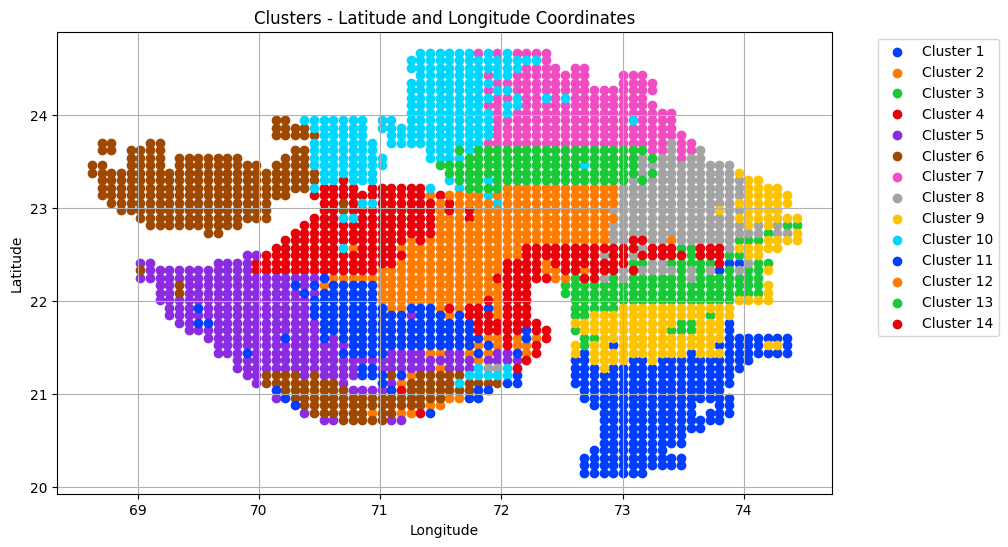

In [108]:
# Plotting each cluster with a different color
plt.figure(figsize=(10, 6))

for i, (cluster_num, cluster_indices) in enumerate(clusters.items()):
    cluster_data = df.loc[df['Index'].isin(cluster_indices)]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_num + 1}')

# Customize the plot
plt.title('Clusters - Latitude and Longitude Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

In [102]:
#checking if clusters have no duplicates
def has_duplicates(arr):
    # Convert the array to a set to remove duplicates
    unique_elements = set(arr)
    
    # If the length of the set is less than the length of the array, there are duplicates
    # Otherwise, there are no duplicates
    return len(unique_elements) < len(arr)


#Checking if all the nodes have been included
for c in clusters.items():
    print(has_duplicates(c[1]))

arr = [i for i in range(2418)]

temp_arr = []
for c in clusters.items():
    for i in c[1]:
        temp_arr.append(i)

print(sorted(temp_arr)==arr)



False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
